# How can you generate higher ratings?
To answer this question I will use listing data to model and predict the ratings that would be generated by a given Seattle AirBnb listing,

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Pretty display for notebooks
%matplotlib inline
% config InlineBachend.figure_format = 'retina'

# Data Exploration

In [2]:
# Load in the data and see the of it
Listings_data = pd.read_csv('listings.csv')

# Display the 5 first record
Listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Data shape
Listings_data.shape

(3818, 92)

In [4]:
# A look at the variable
Listings_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

# Variables classification
After a quick look at the variables of our dataset we can classif them into 5 categories:

DESCRIPTIONS : name, summary, space, description.

HOST : host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost.

HOME DETAILS : property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities.

LISTING ELEMENTS : price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation policy.

SCORES : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [5]:
list_var = ['name', 'summary', 'space', 'description', 'host_response_time',
            'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
            'neighbourhood_group_cleansed', 'property_type', 'room_type',
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
            'amenities', 'price', 'cleaning_fee', 'minimum_nights',
            'maximum_nights', 'instant_bookable',  'cancellation_policy',
            'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value']
# Get a subset of data
df = Listings_data[list_var]
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
name                            3818 non-null object
summary                         3641 non-null object
space                           3249 non-null object
description                     3818 non-null object
host_response_time              3295 non-null object
host_response_rate              3295 non-null object
host_acceptance_rate            3045 non-null object
host_is_superhost               3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
property_type                   3817 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-nu

In [6]:
# Look at the 10 first variable
df.iloc[:5, 0:10]

,name,summary,space,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,96%,100%,f,Queen Anne,Apartment
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,98%,100%,t,Queen Anne,Apartment
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,67%,100%,f,Queen Anne,House
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,f,Queen Anne,Apartment
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,100%,NaN,f,Queen Anne,House


In [7]:
# Look at the 12 second variable
df.iloc[:5, 10:22]

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,1,365,f
1,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$40.00,2,90,f
2,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$300.00,4,30,f
3,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,NaN,1,1125,f
4,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$125.00,1,1125,f


In [8]:
# Look at the rest of variable
df.iloc[:5, 22:]

,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,moderate,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,strict,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,strict,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,strict,92.0,9.0,9.0,10.0,10.0,9.0,9.0


# Cleaning data

In [9]:
# Get lengths of description elements
df['name_length'] = df['name'].str.len()
df['summary_length'] = df['summary'].str.len()
df['space_length'] = df['space'].str.len()
df['description_length'] = df['description'].str.len()
df['amenities_length'] = df['amenities'].str.len()

# Full nan values by 0
df['name_length'].fillna(0, inplace=True)
df['summary_length'].fillna(0, inplace=True)
df['space_length'].fillna(0, inplace=True)
df['description_length'].fillna(0, inplace=True)
df['amenities_length'].fillna(0, inplace=True)

# Drop original variable
df = df.drop(['name', 'summary', 'space', 'description', 'amenities'], axis=1)
df.head()

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,name_length,summary_length,space_length,description_length,amenities_length
0,within a few hours,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,9.0,10.0,28,0.0,1000.0,1000,114
1,within an hour,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,34,249.0,1000.0,1000,243
2,within a few hours,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.0,10.0,10.0,10.0,10.0,35,241.0,1000.0,1000,291
3,NaN,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,18,243.0,0.0,243,197
4,within an hour,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,9.0,10.0,10.0,9.0,9.0,30,184.0,488.0,1000,181


In [10]:
# Count host_response_time values
df['host_response_time'].value_counts(dropna=False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

In [11]:
# Convert host_response_time to integers
df['host_response_time'].replace('within an hour', 1, inplace=True)
df['host_response_time'].replace('within a few hours', 2, inplace=True)
df['host_response_time'].replace('within a day', 3, inplace=True)
df['host_response_time'].replace('a few days or more', 4, inplace=True)

# Impute missing values using forward-fill method
df['host_response_time'].fillna(method='ffill', inplace=True)

In [12]:
# Convert host_response_rate and host_acceptance_rate to number between 0 and 1
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace(
    '%', '', regex=True).astype('float64')/100.00
df['host_response_rate'] = df['host_response_rate'].replace(
    '%', '', regex=True).astype('float64')/100.00

# Impute missing values using forward-fill method
df['host_response_rate'].fillna(method='ffill', inplace=True)
df['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [13]:
# Count host_is_superhost variable values
df['host_is_superhost'].value_counts(dropna=False)

f      3038
t       778
NaN       2
Name: host_is_superhost, dtype: int64

In [14]:
# Change f/t values to binary 0/1
df['host_is_superhost'].replace('t', 1, inplace=True)
df['host_is_superhost'].replace('f', 0, inplace=True)
df['instant_bookable'].replace('t', 1, inplace=True)
df['instant_bookable'].replace('f', 0, inplace=True)

# Impute missing values by mode value
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace=True)

In [15]:
# Clean property_type variable
df['property_type'].value_counts(dropna=False)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
NaN                   1
Name: property_type, dtype: int64

In [16]:
# Clean property_type category to 5 categories


def recode_property_type(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value


df['property_type'] = df['property_type'].apply(recode_property_type)

In [17]:
# Check bed_type variable
df['bed_type'].value_counts(dropna=False)

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [18]:
# Recode bed_type to binary real bed or other


def recode_bed_type(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value


df['bed_type'] = df['bed_type'].apply(recode_bed_type)

In [19]:
# Convert cleaning_fee and price from strings to numbers
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype('float64')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '').astype('float64')

In [20]:
# Impute missing values
df['cleaning_fee'].fillna(0, inplace=True)
df['bathrooms'].fillna(method='ffill', inplace=True)
df['bedrooms'].fillna(method='ffill', inplace=True)
df['beds'].fillna(method='ffill', inplace=True)
df['host_is_superhost'].fillna(method='ffill', inplace=True)

In [21]:
# Drop row without outcome
df = df[df['review_scores_rating'].isnull() == 0]

In [22]:
# Look at our data
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 30 columns):
host_response_time              3171 non-null float64
host_response_rate              3171 non-null float64
host_acceptance_rate            3171 non-null float64
host_is_superhost               3171 non-null float64
neighbourhood_group_cleansed    3171 non-null object
property_type                   3171 non-null object
room_type                       3171 non-null object
accommodates                    3171 non-null int64
bathrooms                       3171 non-null float64
bedrooms                        3171 non-null float64
beds                            3171 non-null float64
bed_type                        3171 non-null object
price                           3171 non-null float64
cleaning_fee                    3171 non-null float64
minimum_nights                  3171 non-null int64
maximum_nights                  3171 non-null int64
instant_bookable                3171 no

In [23]:
# Distributions of numeric variable
df_num = df.select_dtypes(exclude=['object'])  # select numeric variable
df_num = df_num.dropna(axis=0, how='any')
# Print the shape
df_num.shape

(3158, 25)

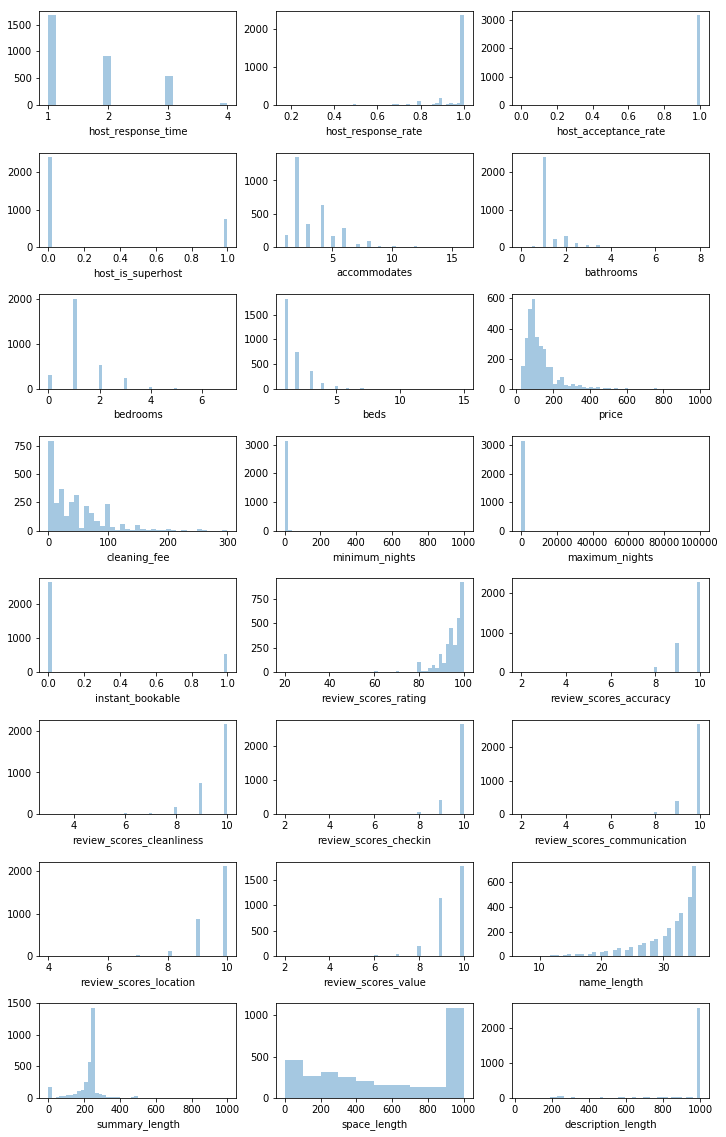

In [24]:
# Get the list of numeric variables
df_num_variables = list(df_num)

# Set the number of graphs in the facet chart
graphs = len(df_num_variables)-1

# Create a list of positions for the chart
position = []
for i in range(8):
    for j in range(3):
        b = i, j
        position.append(b)

# Create base of subplot chart.. rows x columbs = graphs
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False,
                         figsize=(12, 20))
fig.subplots_adjust(hspace=.5)

# Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(df_num[df_num_variables[i]], ax=axes[position[i]], kde=False)

In [25]:
# Look  at Correlation between variables
corr = df.corr()
# Get review_scores_rating corr
corr['review_scores_rating'].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642882
review_scores_accuracy         0.621257
review_scores_communication    0.540620
review_scores_checkin          0.521813
review_scores_location         0.368423
host_is_superhost              0.240895
amenities_length               0.156362
host_response_rate             0.130394
summary_length                 0.065434
price                          0.055551
description_length             0.048678
bathrooms                      0.044645
bedrooms                       0.024235
instant_bookable               0.006071
minimum_nights                 0.001392
beds                          -0.000720
cleaning_fee                  -0.004638
name_length                   -0.007339
accommodates                  -0.013101
host_acceptance_rate          -0.014684
space_length                  -0.021034
maximum_nights                -0.031313
host_response_time            -0.097097


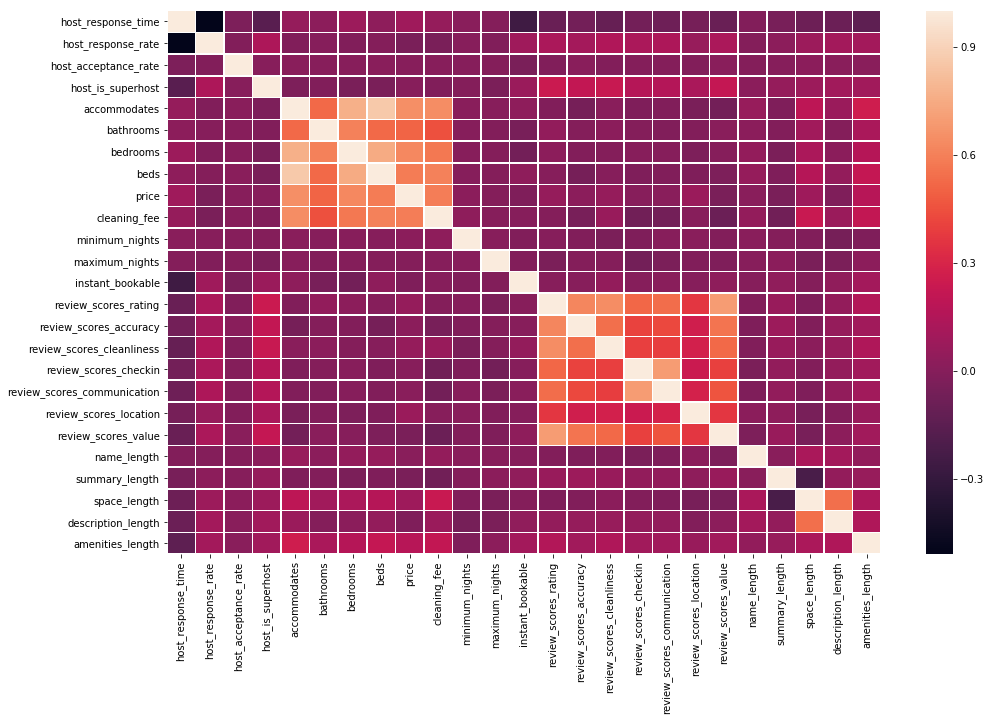

In [26]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(16, 10))
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)

The ratings subscore tend to correlate with the overall rating, but beyond that, biggest correlates so far with review_score_rating appear to be:

host_is_superhost
amenities_length
host_response_rate

In [27]:
# Remove all ratings except overall review_scores_rating outcome
df_model = df.loc[:, ('host_response_time', 'host_response_rate',
                      'host_acceptance_rate', 'host_is_superhost',
                      'neighbourhood_group_cleansed', 'property_type',
                      'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                      'beds', 'bed_type', 'price', 'cleaning_fee',
                      'minimum_nights', 'maximum_nights', 'instant_bookable',
                      'cancellation_policy', 'review_scores_rating',
                      'name_length', 'summary_length', 'space_length',
                      'description_length', 'amenities_length')]

In [28]:
# Looking to the range of numerical variable
df_model.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,review_scores_rating,name_length,summary_length,space_length,description_length,amenities_length
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,1.661936,0.952135,0.999685,0.236834,3.384421,1.258278,1.303059,1.742353,126.802586,46.357616,2.395774,753.925576,0.170293,94.539262,30.666982,223.163671,565.145380,910.025859,201.462630
std,0.794221,0.113791,0.017758,0.425207,1.991495,0.593463,0.874410,1.154951,90.007172,49.580513,17.850468,1836.189972,0.375950,6.606083,5.000641,80.636162,377.050595,220.666134,69.136828
min,1.000000,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,20.000000,7.000000,0.000000,0.000000,34.000000,2.000000
25%,1.000000,0.990000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,75.000000,6.500000,1.000000,31.000000,0.000000,93.000000,29.000000,215.000000,221.500000,1000.000000,155.000000
50%,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,100.000000,35.000000,2.000000,1125.000000,0.000000,96.000000,32.000000,242.000000,549.000000,1000.000000,199.000000
75%,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000,150.000000,70.000000,2.000000,1125.000000,0.000000,99.000000,34.000000,249.000000,1000.000000,1000.000000,246.000000
max,4.000000,1.000000,1.000000,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,300.000000,1000.000000,100000.000000,1.000000,100.000000,36.000000,1000.000000,1000.000000,1000.000000,446.000000


# Re-Encode Categorical Features

In [29]:
# Inspect Categorical Features values
print('- neighbourhood_group_cleansed values : ', list(df_model['neighbourhood_group_cleansed'].unique()))
print('- property_type values : ', list(df_model['property_type'].unique()))
print('- room_type values : ', list(df_model['room_type'].unique()))
print('- bed_type values : ', list(df_model['bed_type'].unique()))
print('- cancellation_policy values : ', list(df_model['cancellation_policy'].unique()))

- neighbourhood_group_cleansed values :  ['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade', 'Central Area', 'University District', 'Downtown', 'Magnolia', 'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley', 'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill', 'Lake City']
- property_type values :  ['Apartment', 'House', 'Other', 'Condominium']
- room_type values :  ['Entire home/apt', 'Private room', 'Shared room']
- bed_type values :  ['Real Bed', 'Other']
- cancellation_policy values :  ['moderate', 'strict', 'flexible']


All categoricals features contain less than 4 values expet neighbourhood_group_cleansed values feature which is an important feature in our data, Therefore I decided to keep them all and change them to dummy variables.

In [30]:
# Convert categorical fields to dummy variables
df_model = pd.get_dummies(df_model, columns=['neighbourhood_group_cleansed',
                                             'property_type', 'room_type',
                                             'bed_type',
                                             'cancellation_policy'])

In [31]:
df_model.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Other,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,2.0,0.96,1.0,0.0,4,1.0,1.0,1.0,85.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1,1.0,0.98,1.0,1.0,4,1.0,1.0,1.0,150.0,40.0,...,0,0,1,0,0,0,1,0,0,1
2,2.0,0.67,1.0,0.0,11,4.5,5.0,7.0,975.0,300.0,...,1,0,1,0,0,0,1,0,0,1
4,1.0,1.00,1.0,0.0,6,2.0,3.0,3.0,450.0,125.0,...,1,0,1,0,0,0,1,0,0,1
5,1.0,1.00,1.0,0.0,2,1.0,1.0,1.0,120.0,40.0,...,1,0,0,1,0,0,1,0,0,1


# Modelling The Data

In [32]:
# Split data features and  labels
review_score = df_model['review_scores_rating']
features_final = df_model.drop(['review_scores_rating'], axis=1)

# Scaling Features

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_final[features_final.columns] = scaler.fit_transform(features_final)

Split the data into training and test sets. 80% of the data will be used for training and 20% for testing.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    review_score,
                                                    test_size=0.2,
                                                    random_state=42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2536 samples.
Testing set has 635 samples.


# Supervised Learning Models
**The following are some of the supervised learning models for regression problem that I will test on the data

LinearRegression
K-Nearest Neighbors Regression
Decision Tree
Random Forest
Gradient Boosted Regression
Support Vector Machine Regression

# Implementation - Creating a Training and Predicting Pipeline

In [35]:
# Import metrics
from sklearn.metrics import mean_squared_error


def train_predict(learner, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples to be drawn from training set
       - X_train: features training set
       - y_train: review_score training set
       - X_test: features testing set
       - y_test: review_score testing set
    output :
       - Root mean squared error on the testing data
    '''
    # Fit the learner to the training data using slicing with 'sample_size'
    learner = learner.fit(X_train, y_train)
    # Get the predictions on the test set,
    predictions_test = learner.predict(X_test)
    # Compute accuracy on test set using accuracy_score()
    MSE = mean_squared_error(y_test, predictions_test)
    # Success
    print("{} trained.".format(learner.__class__.__name__))
    # Return the results
    return np.sqrt(MSE)

# Initial Model Evaluation

In [36]:
# Import Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the  models
reg_A = LinearRegression()
reg_B = KNeighborsRegressor(n_neighbors=10)
reg_C = DecisionTreeRegressor(random_state=60)
reg_D = SVR(C=1000, gamma=0.1)
reg_E = RandomForestRegressor(random_state=60)
reg_F = GradientBoostingRegressor(random_state=60)

# Collect results on the learners
results = {}
for reg in [reg_A, reg_B, reg_C, reg_D, reg_E, reg_F]:
    reg_name = reg.__class__.__name__
    results[reg_name] = train_predict(reg, X_train, y_train, X_test, y_test)

LinearRegression trained.
KNeighborsRegressor trained.
DecisionTreeRegressor trained.
SVR trained.
RandomForestRegressor trained.
GradientBoostingRegressor trained.


In [37]:
results

{'DecisionTreeRegressor': 8.6028744509551949,
 'GradientBoostingRegressor': 6.5018447336315388,
 'KNeighborsRegressor': 6.9138569064477062,
 'LinearRegression': 875303586746.11938,
 'RandomForestRegressor': 6.7566419002455635,
 'SVR': 7.4396406459865521}

Depending on the run, the gradient boosting regressor performs the best followed by the random forest. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. (the random forest and gradient boosting methods are great for starting out because the performance is less dependent on the model settings). Nonetheless, it is not a probleme in our case because we are just looking for the most importing features.

# Extracting Feature Importance

In [38]:
model = GradientBoostingRegressor(random_state=60)

model.fit(X_train, y_train)

# Extract the feature importances using.
importances = model.feature_importances_

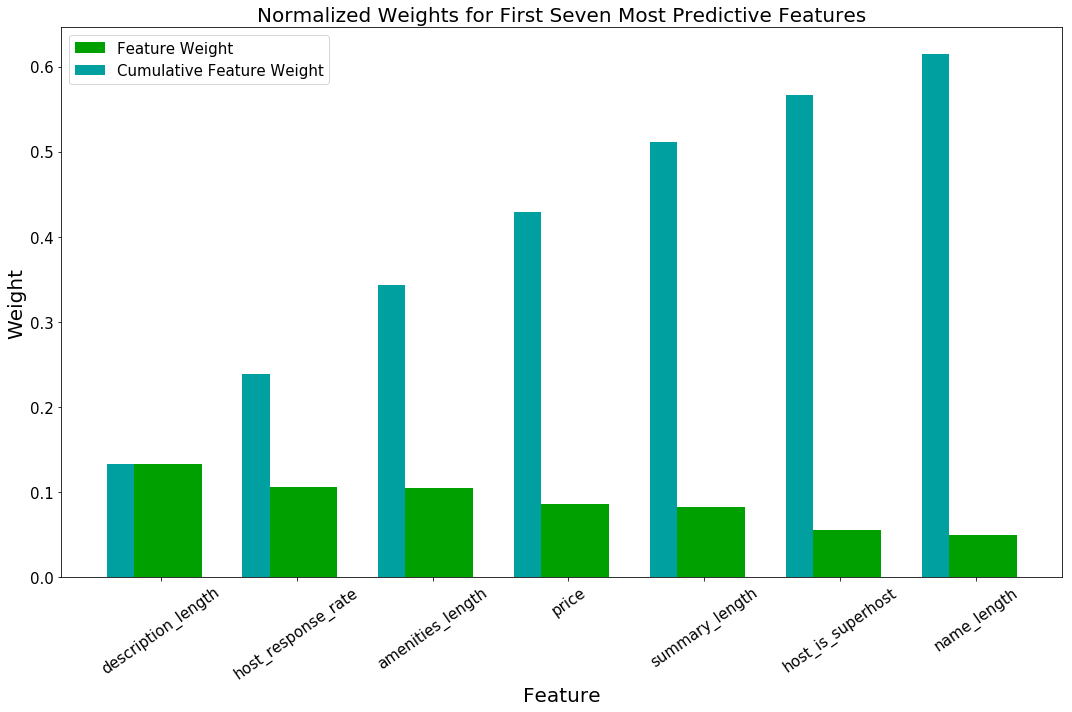

In [39]:
# Display the seven most important features
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:7]]
values = importances[indices][:7]
# Creat the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
plt.title("Normalized Weights for First Seven Most Predictive Features",
          fontsize=20)
plt.bar(np.arange(7), values, width=0.6, align="center", color='#00A000',
        label="Feature Weight")
plt.bar(np.arange(7)-0.3, np.cumsum(values), width=0.2, align="center",
        color='#00A0A0', label="Cumulative Feature Weight")
plt.xticks(np.arange(7), columns, rotation=45, fontsize=15)
ax.set_xlabel('Feature', weight='normal', size=20)
ax.set_ylabel('Weight', weight='normal', size=20)
# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()